# Proyecto final: Vinos blancos
Proyecto final para la certificación "Big Data aplicada a negocios"- Crehana

In [1]:
#Importamos todos los paquetes que vamos a necesitar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
#Cargamos el dataset
wine = pd.read_csv('Datos_vinos_blancos.csv')

In [3]:
#Miramos las primeras 5 lineas del dataset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success,pricing,country
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,0.088,84.0,Budget,Italy
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,0.095,12.0,Expensive,Spain
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,0.101,54.0,Medium,Italy
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,0.099,88.0,Medium,Spain
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,0.099,80.0,Expensive,Spain


In [4]:
#Miramos la tipologia de los datos y si faltan valores 
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  success               4898 non-null   float64
 12  pricing               4898 non-null   object 
 13  country               4898 non-null   object 
dtypes: float64(12), object(2)
memory usage: 535.8+ KB


In [5]:
#Obtenemos las estadisticas del dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,0.103078,55.072683
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,0.024738,28.763988
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,-0.148345,10.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,0.094000,19.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,0.104000,60.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,0.114000,83.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,0.142000,99.000000


# Analisis y limpieza de datos

<AxesSubplot:xlabel='country', ylabel='count'>

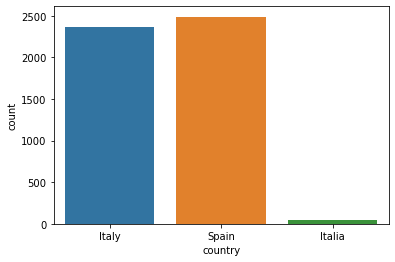

In [6]:
# Empezamos con un grafico de barras de la proveniencia geografica de los vinos
sns.countplot(x='country', data=wine)

In [7]:
# Selecionamos todas las lineas que contienen "ita"
italy_data = wine['country'].str.contains('ita', case = False)
italy_data

0        True
1       False
2        True
3       False
4       False
        ...  
4893    False
4894    False
4895     True
4896    False
4897    False
Name: country, Length: 4898, dtype: bool

In [8]:
# Si una linea contiene 'ita', la convertimos en Italy
wine['country'] = np.where(italy_data, 'Italy', wine['country'])


<AxesSubplot:xlabel='country', ylabel='count'>

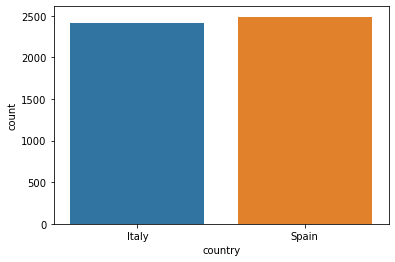

In [9]:
# Miramos otra vez el grafico de barras
sns.countplot(x='country', data=wine)

<AxesSubplot:xlabel='pricing', ylabel='count'>

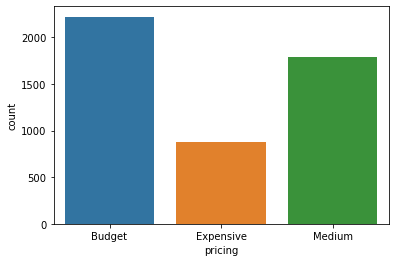

In [10]:
# Seguimos con un grafico de barras de los rangos de precios
sns.countplot(x='pricing', data=wine)

<AxesSubplot:xlabel='pricing', ylabel='count'>

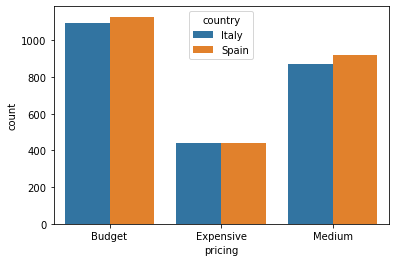

In [11]:
# Lo podemos subagrupar por procedencia geografica
sns.countplot(x='pricing', hue='country', data=wine)

<AxesSubplot:ylabel='success'>

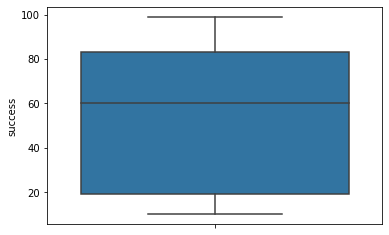

In [12]:
# Ahora hacemos un boxplot y un histograma de la variable success
sns.boxplot(y = 'success', data = wine)

<AxesSubplot:xlabel='success', ylabel='Count'>

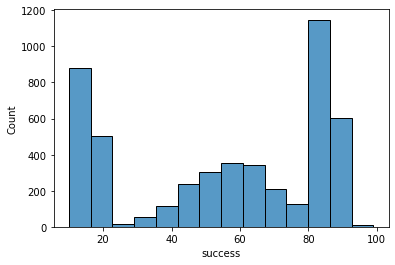

In [13]:
sns.histplot(wine['success'])

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

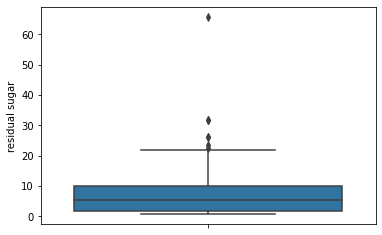

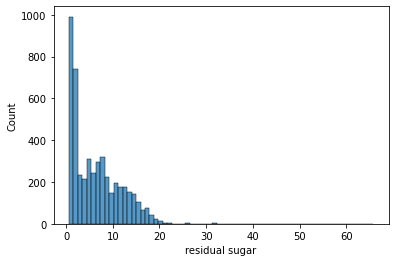

In [14]:
# Hacemos los graficos de la variable residual sugar
sns.boxplot(y = 'residual sugar', data = wine)
plt.figure()
sns.histplot(wine['residual sugar'])

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

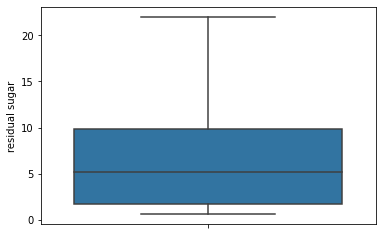

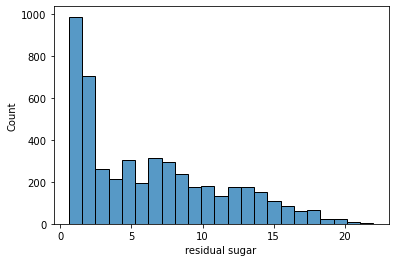

In [15]:
# Eliminamos los valores más altos
high_sugar=wine['residual sugar']>22
wine=wine.drop(wine[high_sugar].index)
# Volvemos a mirar el plot de azucar
sns.boxplot(y = 'residual sugar', data = wine)
plt.figure()
sns.histplot(wine['residual sugar'])

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

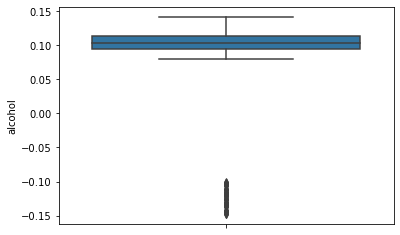

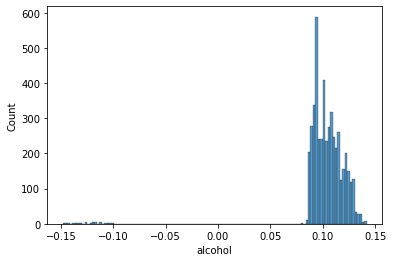

In [16]:
# Graficamos la variable alcohol
sns.boxplot(y = 'alcohol', data = wine)
plt.figure()
sns.histplot(wine['alcohol'], kde = False)

In [17]:
# Procedemos a eliminar los valores negativos
negative_alcohol = wine['alcohol'] < 0
wine = wine.drop(wine[negative_alcohol].index)

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

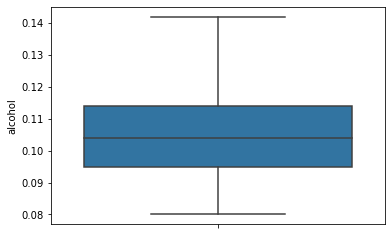

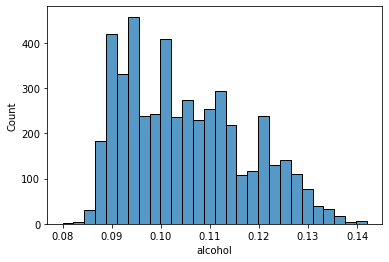

In [18]:
# Volvemos a mirar histograma y boxplot de alcohol
sns.boxplot(y = 'alcohol', data = wine)
plt.figure()
sns.histplot(wine['alcohol'], kde = False)

<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

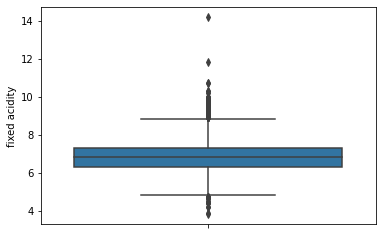

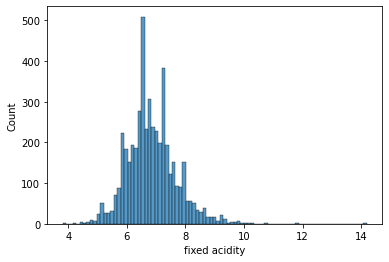

In [19]:
# Graficamos la variable fixed acidity
sns.boxplot(y = 'fixed acidity', data = wine)
plt.figure()
sns.histplot(wine['fixed acidity'], kde = False)

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

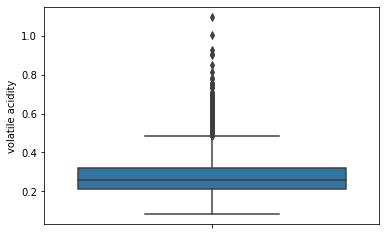

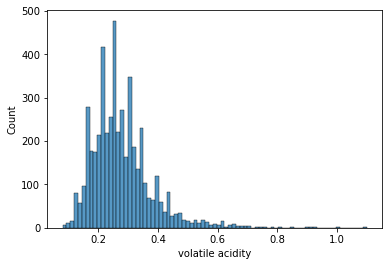

In [20]:
# Graficamos la variable volatile acidity
sns.boxplot(y = 'volatile acidity', data = wine)
plt.figure()
sns.histplot(wine['volatile acidity'], kde = False)

<AxesSubplot:xlabel='chlorides', ylabel='Count'>

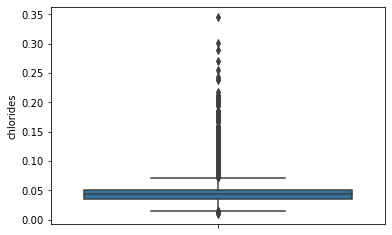

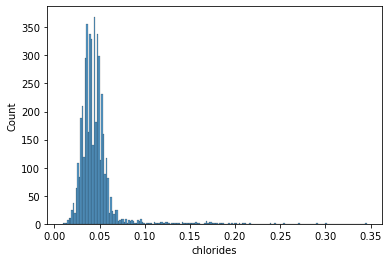

In [22]:
# Graficamos la variable chlorides
sns.boxplot(y = 'chlorides', data = wine)
plt.figure()
sns.histplot(wine['chlorides'], kde = False)

<AxesSubplot:xlabel='citric acid', ylabel='Count'>

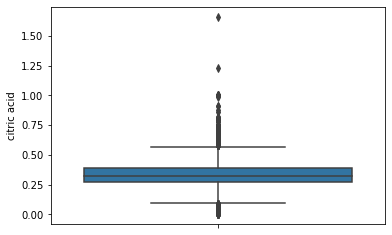

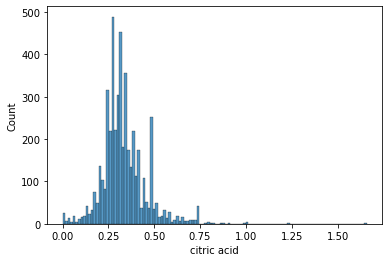

In [23]:
# Graficamos la variable citric acid
sns.boxplot(y = 'citric acid', data = wine)
plt.figure()
sns.histplot(wine['citric acid'], kde = False)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Count'>

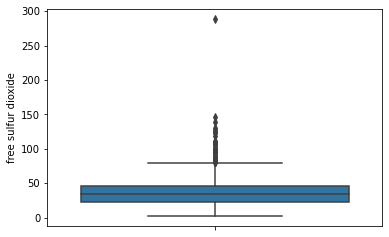

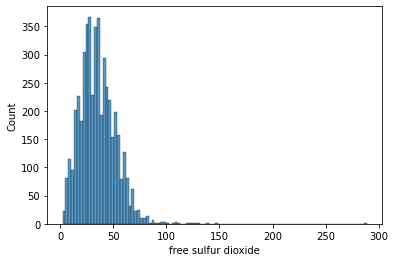

In [24]:
# Graficamos la variable free sulfur dioxide
sns.boxplot(y = 'free sulfur dioxide', data = wine)
plt.figure()
sns.histplot(wine['free sulfur dioxide'], kde = False)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Count'>

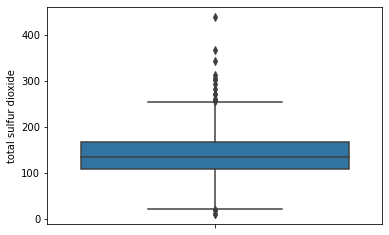

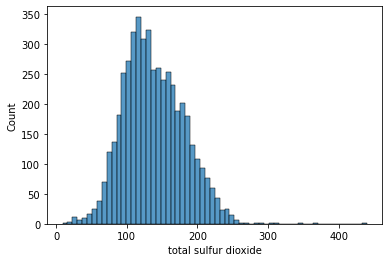

In [25]:
# Graficamos la variable total sulfur dioxide
sns.boxplot(y = 'total sulfur dioxide', data = wine)
plt.figure()
sns.histplot(wine['total sulfur dioxide'], kde = False)

<AxesSubplot:xlabel='density', ylabel='Count'>

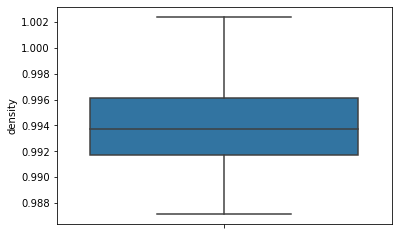

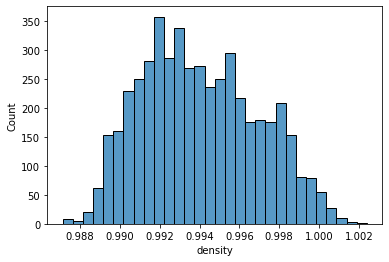

In [26]:
# Graficamos la variable density
sns.boxplot(y = 'density', data = wine)
plt.figure()
sns.histplot(wine['density'], kde = False)

<AxesSubplot:xlabel='pH', ylabel='Count'>

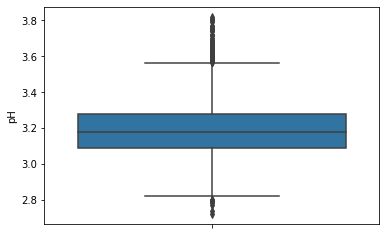

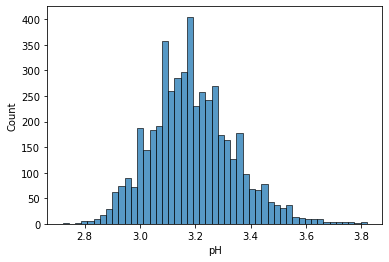

In [27]:
# Graficamos la variable pH
sns.boxplot(y = 'pH', data = wine)
plt.figure()
sns.histplot(wine['pH'], kde = False)

<AxesSubplot:xlabel='sulphates', ylabel='Count'>

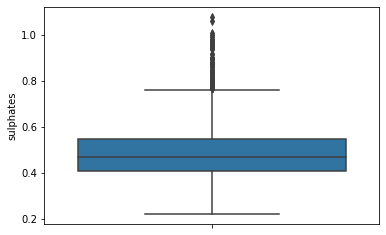

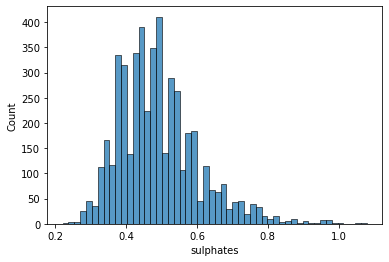

In [28]:
# Graficamos la variable sulphates
sns.boxplot(y = 'sulphates', data = wine)
plt.figure()
sns.histplot(wine['sulphates'], kde = False)

<AxesSubplot:>

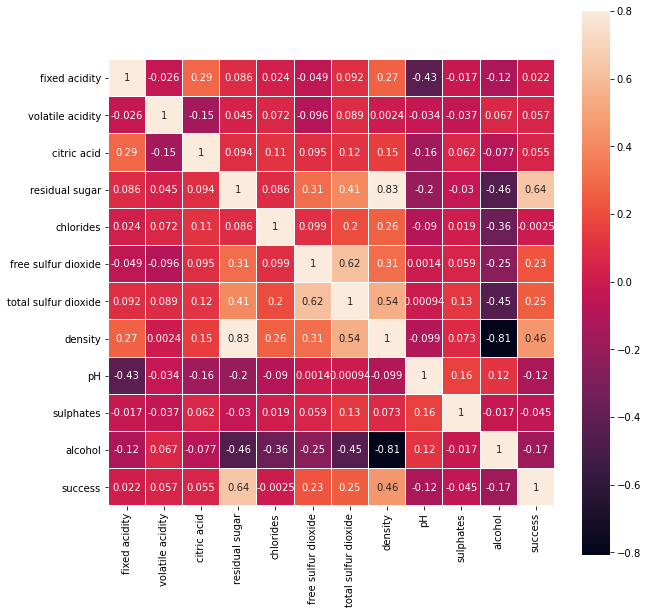

In [29]:
# Miramos el mapa de correlaciones
corr = wine.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True)

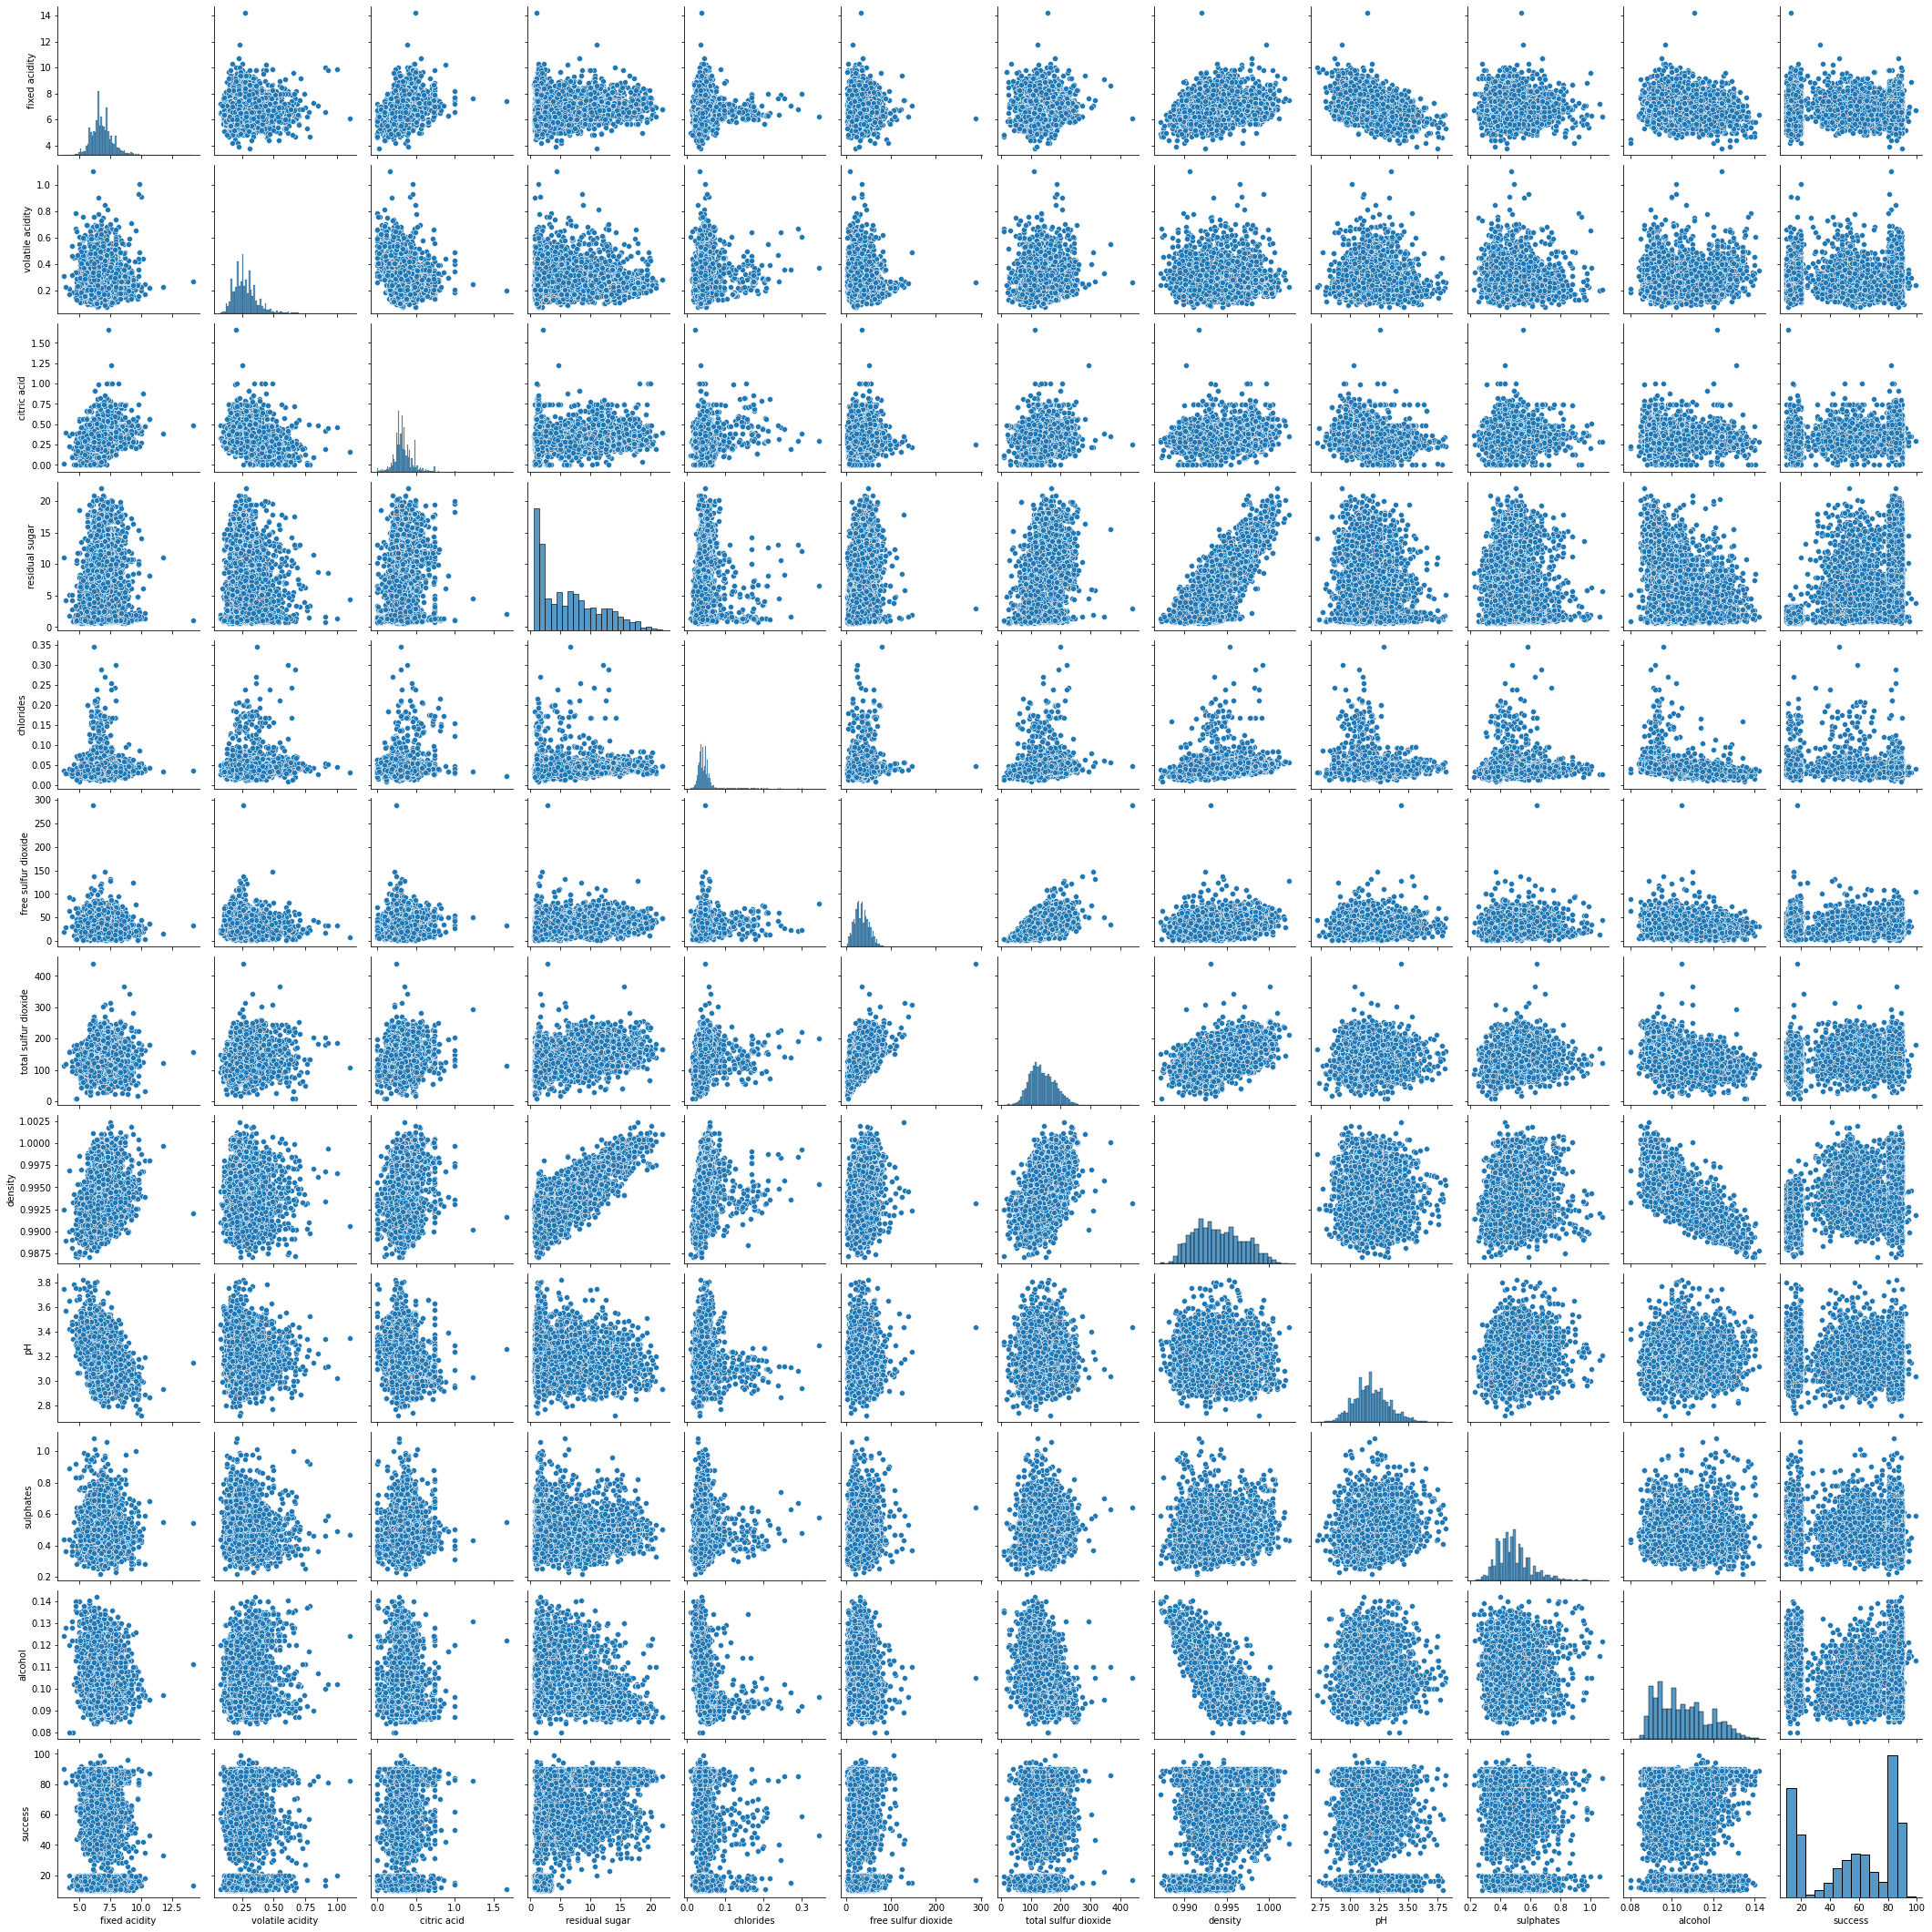

In [30]:
# Miramos el scatter plot completo 
sns.pairplot(wine)

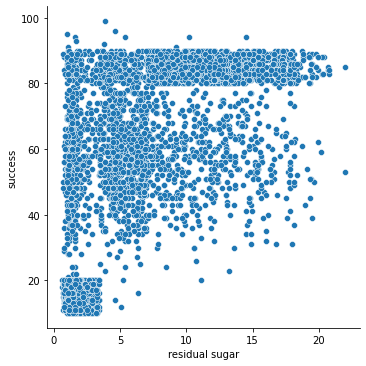

In [31]:
# Miramos en detalle el scatter plot de las variables residual sugar y success
sns.relplot(x="residual sugar", y="success", data=wine)

<AxesSubplot:xlabel='residual sugar', ylabel='success'>

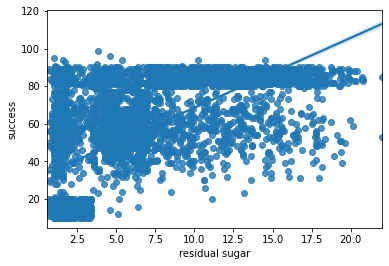

In [32]:
# Vemos la tendencia positiva entre las variables
sns.regplot(x='residual sugar', y="success", data=wine)

AxesSubplot(0.125,0.125;0.775x0.755)


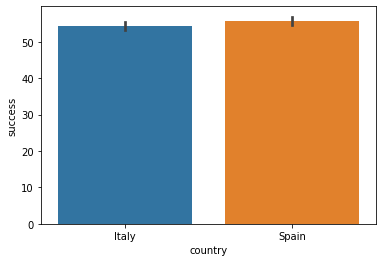

In [33]:
# Miramos la correlación entre la procedencia geografica y la variable success
print(sns.barplot(x = 'country', y = 'success', data = wine))

<AxesSubplot:xlabel='country', ylabel='success'>

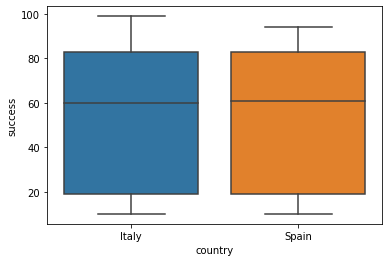

In [34]:
# Mismas variables, con el boxplot lo vemos con mas detalles
sns.boxplot(x = 'country', y = 'success', data = wine)

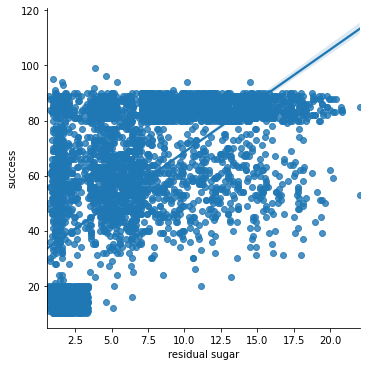

In [17]:
sns.lmplot(x='residual sugar', y="success", data=wine)

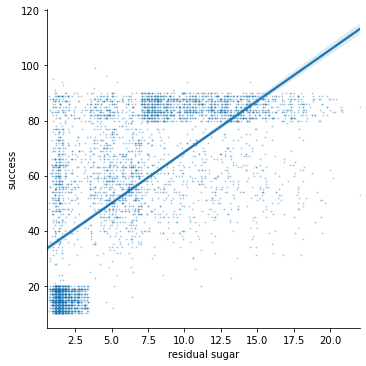

In [35]:
sns.lmplot(x='residual sugar', y="success", data=wine, truncate = True, scatter_kws={'s':0.8, 'alpha':0.3})

Text(0.5, 1.2, 'Más azúcar, más éxito, en Italia como en España! ')

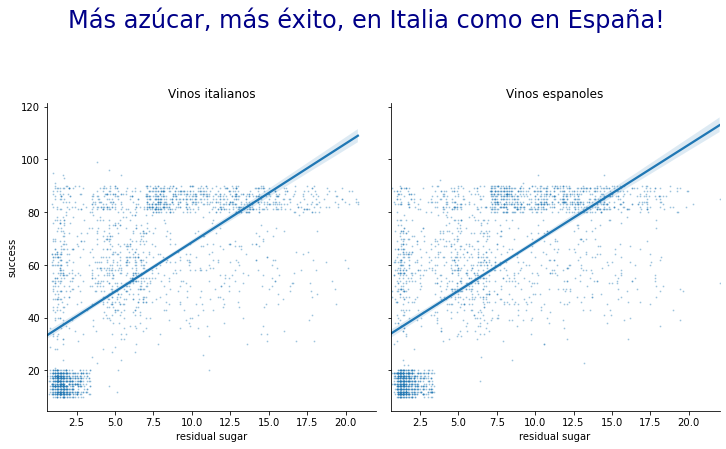

In [36]:
sugar_success_plot=sns.lmplot(x='residual sugar', y="success", col = 'country', data=wine, truncate = True, scatter_kws={'s':0.8, 'alpha':0.3})
sns.despine()
axes = sugar_success_plot.axes.flatten()
axes[0].set_title("Vinos italianos")
axes[1].set_title("Vinos espanoles")
plt.suptitle('Más azúcar, más éxito, en Italia como en España! ',fontsize=24,ha='center',va='top',color='#000088', y=1.2)

# Modelo predictivo

In [37]:
# Cargamos las funciones necesarias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [38]:
# Primero: dividimos los datos entre training y test, la variable dependente (y) como las independientes
X = wine[['residual sugar']]
y = wine['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [39]:
X_train

,residual sugar
4003,1.5
1137,8.4
3956,2.3
887,2.0
1712,3.0
...,...
796,8.8
976,4.9
1681,10.0
3349,9.9


In [40]:
y_train

4003    16.0
1137    89.0
3956    12.0
887     77.0
1712    13.0
        ... 
796     86.0
976     64.0
1681    84.0
3349    58.0
1702    40.0
Name: success, Length: 3878, dtype: float64

In [41]:
X_test

,residual sugar
3901,1.1
2277,1.3
350,2.1
3230,6.6
4335,13.9
...,...
629,1.2
991,1.3
1467,3.0
3055,1.7


In [42]:
y_test

3901    19.0
2277    14.0
350     17.0
3230    72.0
4335    82.0
        ... 
629     10.0
991     13.0
1467    20.0
3055    85.0
3541    73.0
Name: success, Length: 970, dtype: float64

In [43]:
# Escogemos como algoritmo una regresion linear y los entrenamos con el training set
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [44]:
# Podemos predecir ahora valores distintos
regr.predict([[0.11]])

array([31.84424859])

# Evaluaciones del modelo

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [46]:
# Hacemos las predicciones en el test set
regr.predict(X_test)

array([ 35.51112721,  36.25191076,  39.215045  ,  55.88267507,
        82.92127497,  64.401686  ,  50.32679838,  35.51112721,
        55.88267507,  54.77149974,  61.80894355,  77.73579006,
        42.17817924,  88.84754345,  75.14304761,  37.3630861 ,
        52.91954084,  79.58774896,  38.47426144,  36.62230254,
        79.03216129,  80.32853252,  49.9564066 ,  53.28993262,
        35.51112721,  45.88209703,  58.10502575,  35.14073543,
        49.58601482,  81.99529553,  74.40226405,  72.17991337,
        49.9564066 ,  42.54857102,  36.99269432,  38.84465322,
        43.28935457,  61.43855177,  55.5122833 ,  49.9564066 ,
        41.43739568,  34.77034365,  55.88267507,  37.73347788,
        79.58774896,  65.14246956,  35.88151899,  36.25191076,
        36.62230254,  35.88151899,  82.92127497,  52.54914906,
        39.95582856,  38.84465322,  71.06873803,  35.88151899,
        93.10704891,  84.95842976,  38.10386966,  49.9564066 ,
        35.88151899,  43.28935457,  64.401686  ,  37.36

In [47]:
# Ahora miramos el error
print(mean_absolute_error(regr.predict(X_test), y_test))
print(sqrt(mean_squared_error(regr.predict(X_test), y_test)))

18.898823400673088
21.989405769019562


In [48]:
# Ahora probamos otro modelo, usando alcohol y azucar residual
X2 = wine[['alcohol', 'residual sugar']]
y2 = wine['success']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 3)
regr2 = LinearRegression()
# Entrenamos el modelo utilizando el train set
regr2.fit(X2_train,y2_train)
print(mean_absolute_error(regr2.predict(X2_test), y2_test))
print(sqrt(mean_squared_error(regr2.predict(X2_test), y2_test)))

18.504944991182214
21.599402922016175


# Encoding de variables

In [49]:
# Hacemos encoding de nuestras variables categoricas
wine['is_spain'] = np.where(wine['country'] == 'Spain', 1, 0)
wine['pricing_enc'] = np.where(wine['pricing'] == 'Budget', 1, np.where(wine['pricing'] == 'Medium', 2, 3))
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success,pricing,country,is_spain,pricing_enc
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,0.088,84.0,Budget,Italy,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,0.095,12.0,Expensive,Spain,1,3
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,0.101,54.0,Medium,Italy,0,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,0.099,88.0,Medium,Spain,1,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,0.099,80.0,Expensive,Spain,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,0.112,19.0,Budget,Spain,1,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,0.096,89.0,Medium,Spain,1,2
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,0.094,11.0,Budget,Italy,0,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,0.128,16.0,Budget,Spain,1,1


In [50]:
# Evaluamos otra vez la performance de este modelo

X3 = wine.drop(['country', 'pricing', 'success'], axis = 1)
y3 = wine['success']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 3)
regr3 = LinearRegression()
# Entrenamos el modelo utilizando el training set
regr3.fit(X3_train,y3_train)
print(mean_absolute_error(regr3.predict(X3_test), y3_test))
print(sqrt(mean_squared_error(regr3.predict(X3_test), y3_test)))


18.339382039478057
21.438814123047482


# Random Forest and hyperparameter optimization

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [52]:
# Ahora pruebamos un modelo de random forest.
# Empezamos con parametros fijos
X4 = wine.drop(['country', 'pricing', 'success'], axis = 1)
y4 = wine['success']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.2, random_state = 3)
regr4 = RandomForestRegressor(n_estimators = 5, max_features = 10)
# Entrenamos el modelo utilizando el training set
regr4.fit(X4_train,y4_train)
print(mean_absolute_error(regr4.predict(X4_test), y4_test))
print(sqrt(mean_squared_error(regr4.predict(X4_test), y4_test)))

15.154635738831615
20.566873258610286


In [53]:
# Probamos ahora distintos parametros para encontrar los mejores
param_grid = [
{'n_estimators': [10, 25, 100, 150, 200], 'max_features': [5, 10]}]

grid_search_forest = GridSearchCV(regr4, param_grid, cv=10, scoring='neg_mean_absolute_error')
grid_search_forest.fit(X4_train, y4_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_features=10, n_estimators=5),
             param_grid=[{'max_features': [5, 10],
                          'n_estimators': [10, 25, 100, 150, 200]}],
             scoring='neg_mean_absolute_error')

In [54]:
#Seleccionamos el mejor
best_forest = grid_search_forest.best_estimator_
best_forest

RandomForestRegressor(max_features=10, n_estimators=200)

In [55]:
# Miramos ahora el resultado
best_forest.fit(X4_train,y4_train)
print(mean_absolute_error(best_forest.predict(X4_test), y4_test))
print(sqrt(mean_squared_error(best_forest.predict(X4_test), y4_test)))

14.527776300932743
18.80661300377671
